In [3]:
import os
import cde_mot_functions as cf
import ants

# Jupyter specific autoreloading for external functions (in case changes are made)
%load_ext autoreload
%autoreload 2

In [4]:
# Get fish specifications
#-------------------------------------------------------------------------------
Fbase    = '/Volumes/MARIANNE/1812 Critical Dynamics in Epilepsy'
Fish     = cf.cde_mot_fishdef(Fbase)


In [29]:
Fish[10]["cond"][0]["path"]

'/Volumes/MARIANNE/1812 Critical Dynamics in Epilepsy/ZFRR014_02/BL'

Working on fish 1 of 11, condition: BL
I found 7199 images
Of these Im loading 50
Im ignoring the first volume


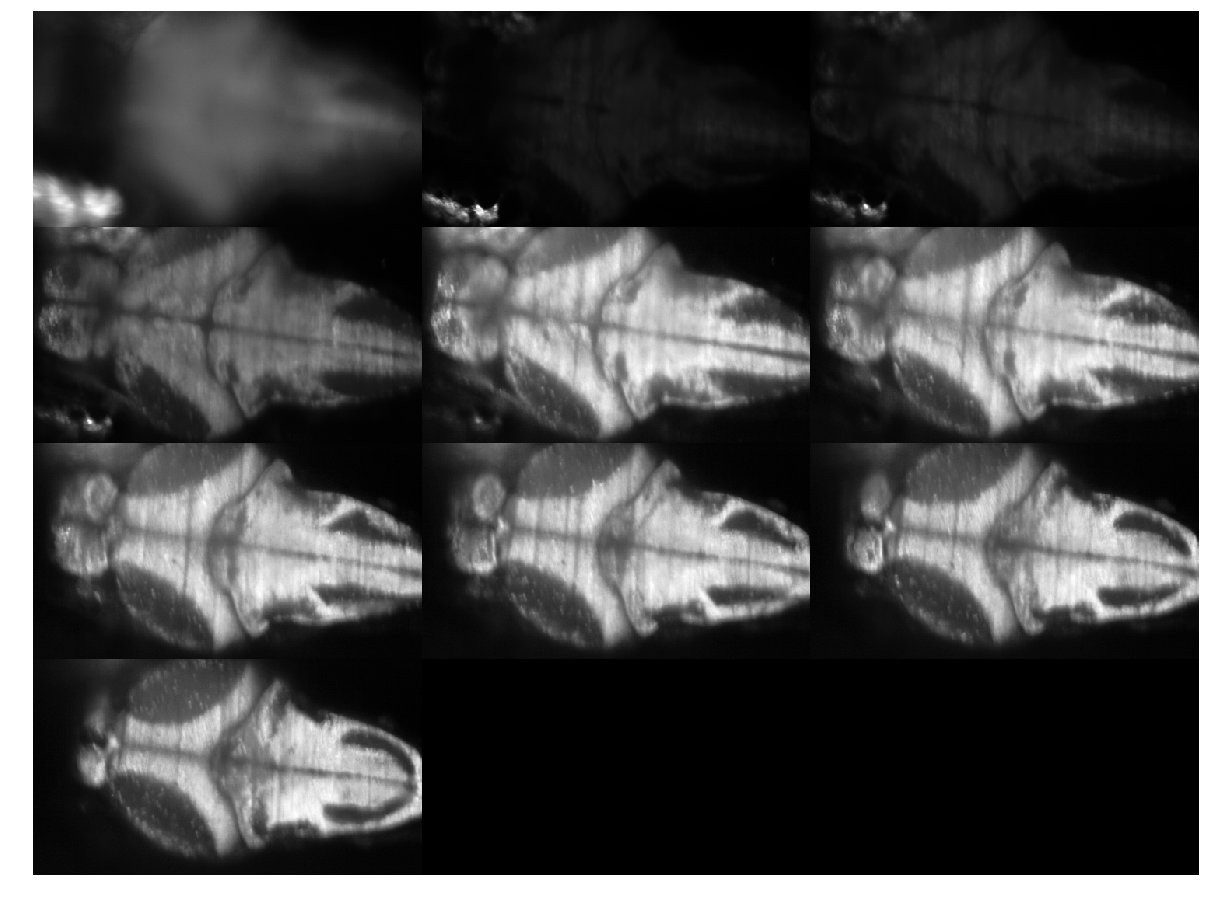

>> Starting rigid registration <<
Completed 100.0% at 2019-03-11 18:10:01
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


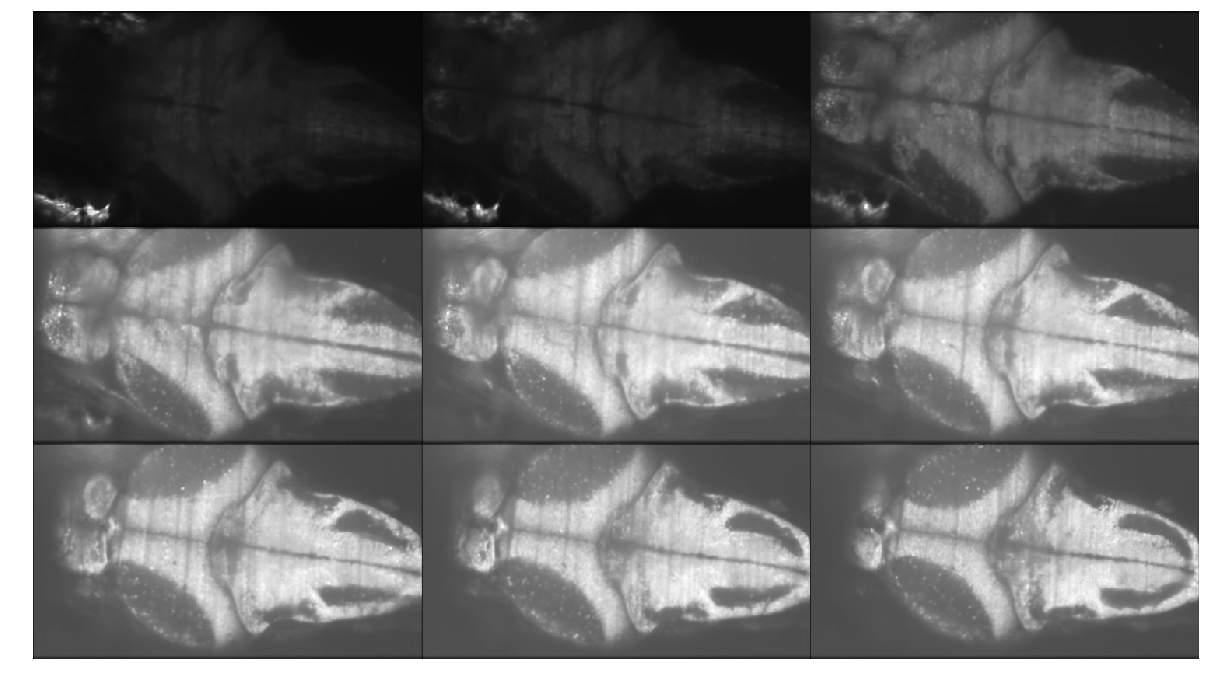

>> Starting rigid registration <<
All done with rigid registration
The returned file contains tifs
Working on fish 1 of 11, condition: PTZ
I found 14400 images
Of these Im loading 50
Im ignoring the first volume


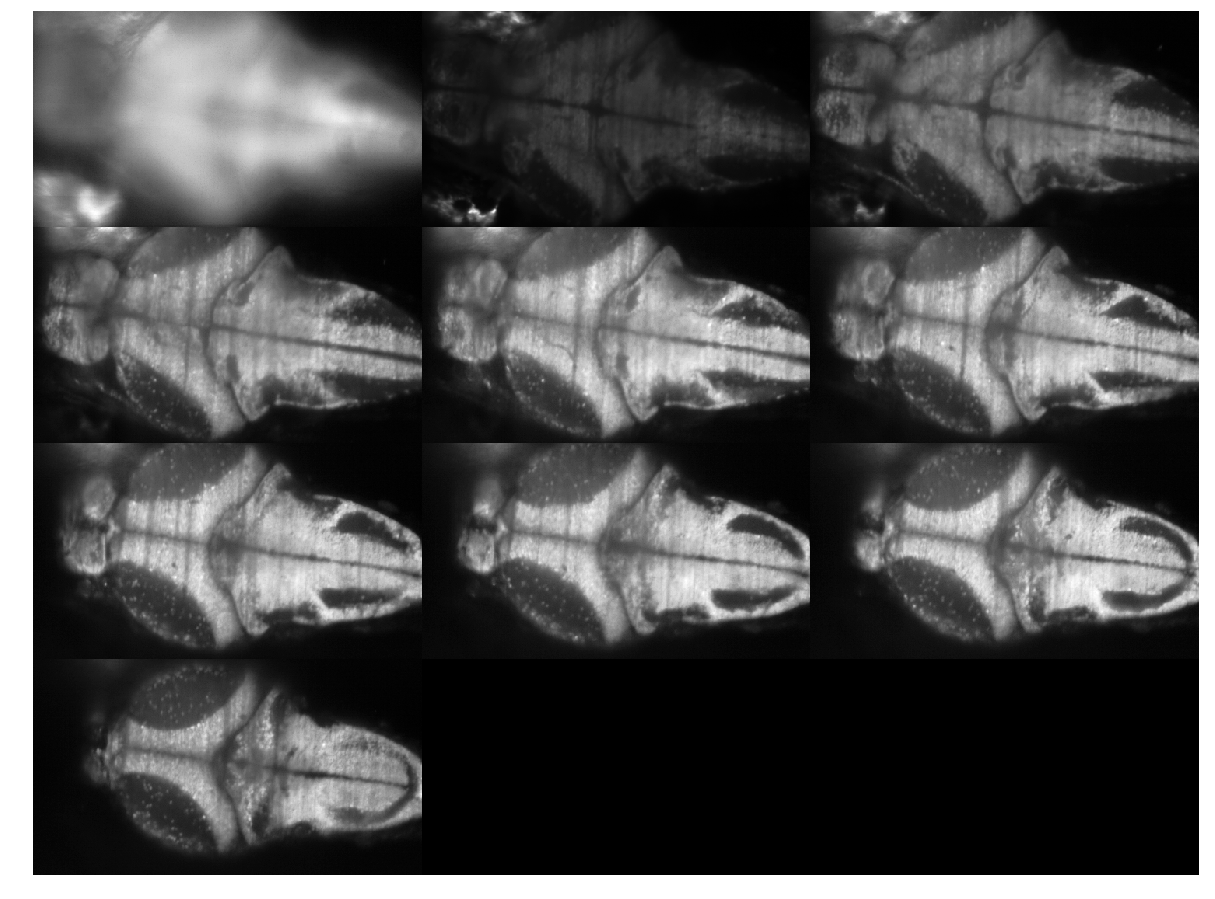

>> Starting rigid registration <<
Completed 100.0% at 2019-03-11 22:24:03
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


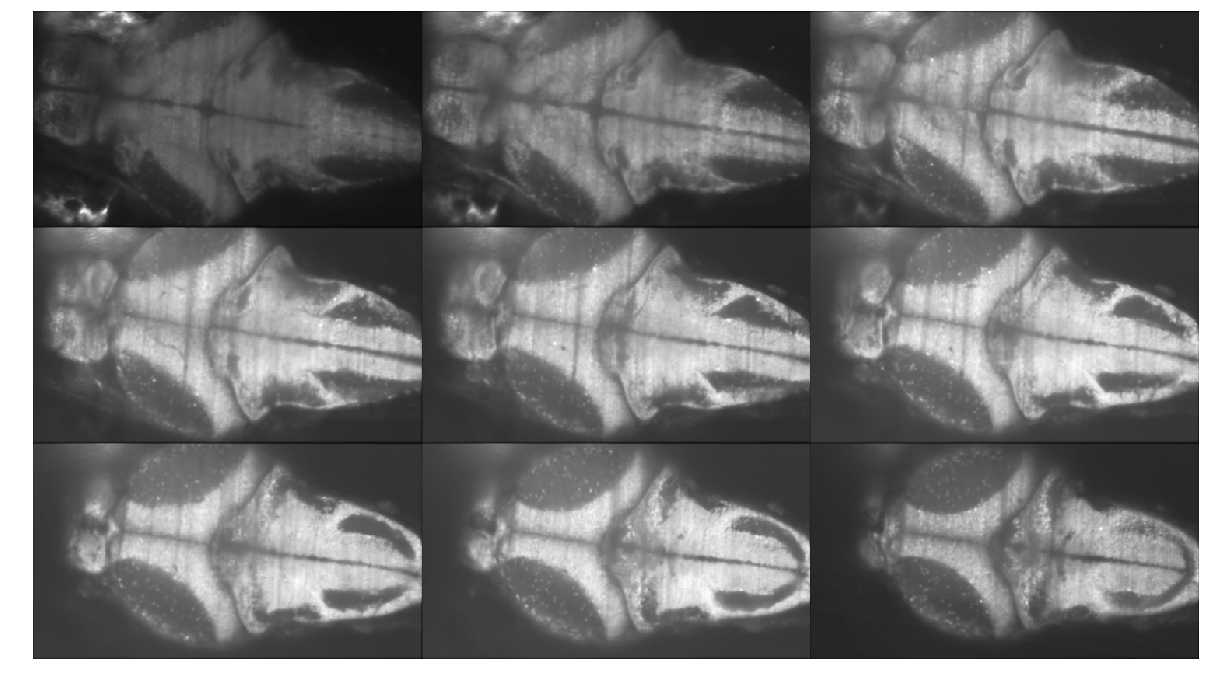

>> Starting rigid registration <<
Completed 5.0% at 2019-03-11 22:49:23
Completed 10.0% at 2019-03-11 23:13:43
Completed 15.0% at 2019-03-11 23:38:35
Completed 20.0% at 2019-03-12 00:03:18
Completed 25.0% at 2019-03-12 00:28:33
Completed 30.0% at 2019-03-12 00:54:18
Completed 35.0% at 2019-03-12 01:18:25
Completed 40.0% at 2019-03-12 01:45:15
Completed 45.0% at 2019-03-12 02:10:30
Completed 50.0% at 2019-03-12 02:35:43
Completed 55.0% at 2019-03-12 03:00:55
Completed 60.0% at 2019-03-12 03:26:13
Completed 65.0% at 2019-03-12 03:50:09
Completed 70.0% at 2019-03-12 04:11:40
Completed 75.0% at 2019-03-12 04:33:58
Completed 80.0% at 2019-03-12 04:55:06
Completed 85.0% at 2019-03-12 05:16:58
Completed 90.0% at 2019-03-12 05:38:45
Completed 95.0% at 2019-03-12 06:00:09
Completed 100.0% at 2019-03-12 06:21:28
All done with rigid registration
The returned file contains tifs
Working on fish 11 of 11, condition: BL
I found 7200 images
Of these Im loading 50
Im ignoring the first volume


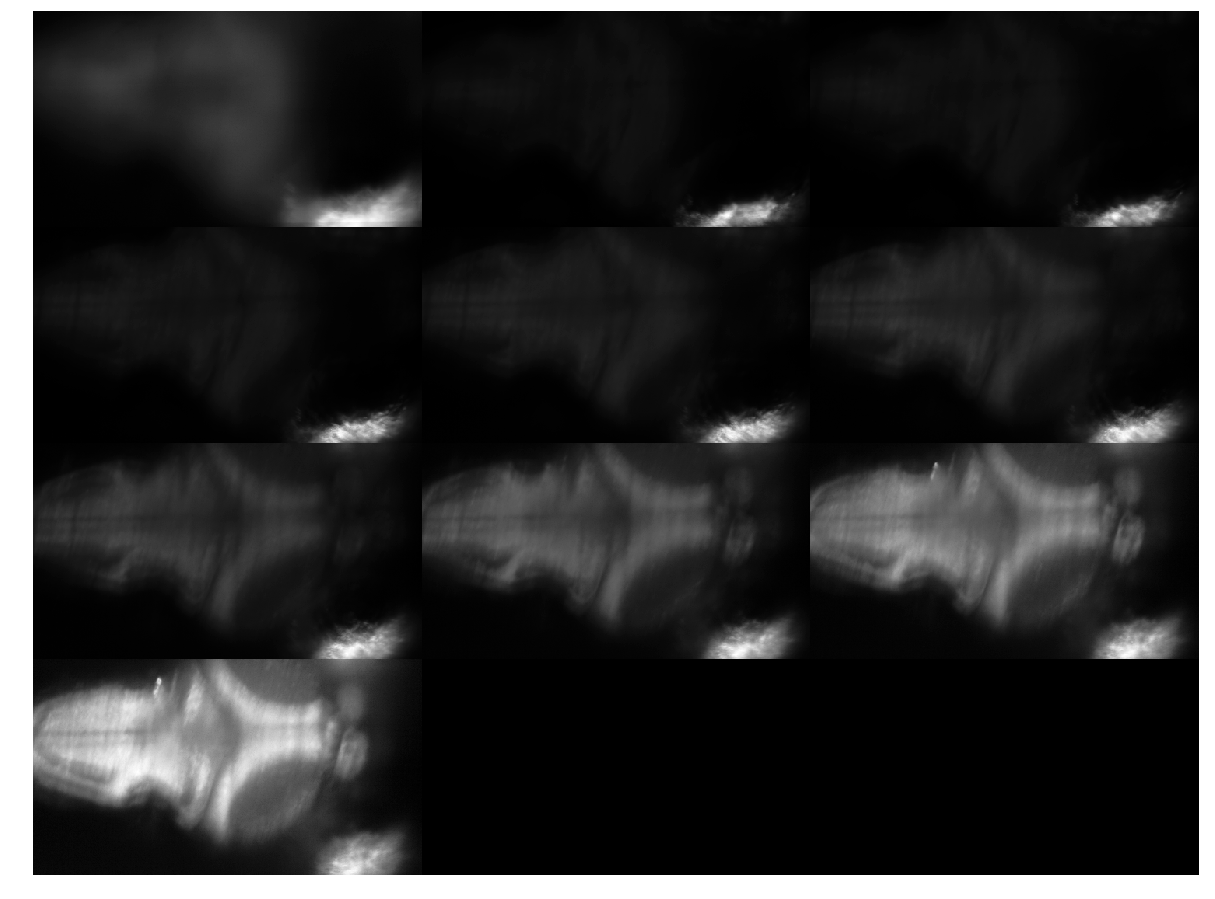

>> Starting rigid registration <<
Completed 100.0% at 2019-03-12 06:22:47
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


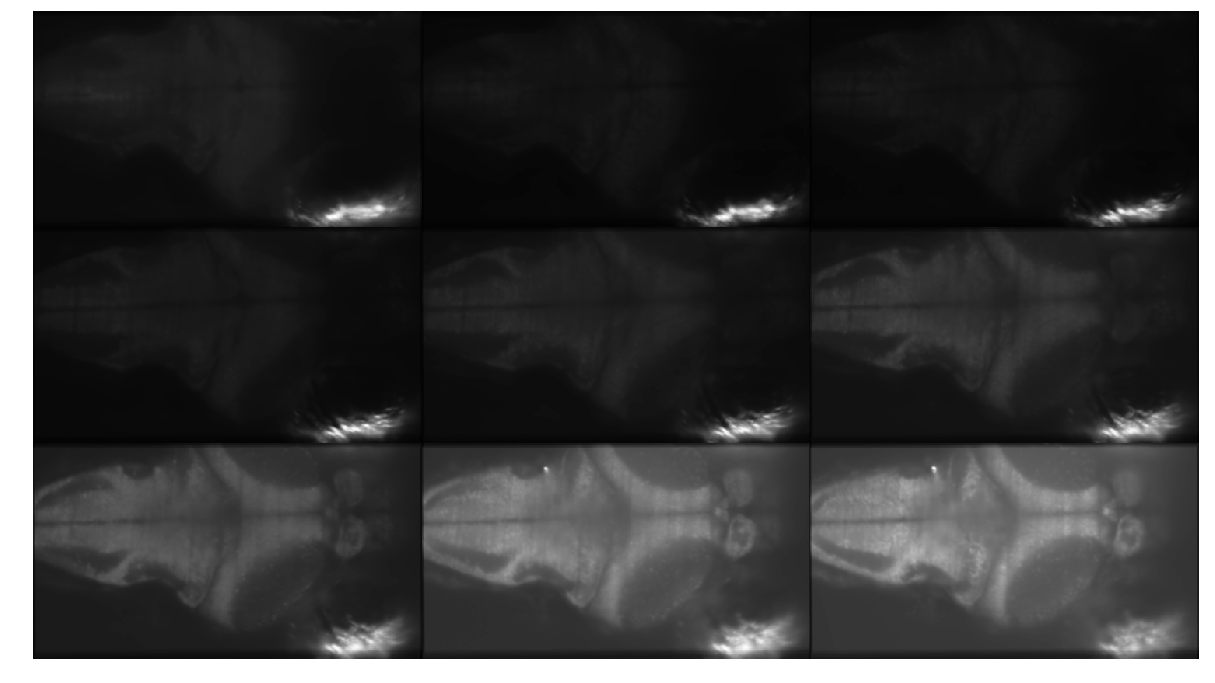

>> Starting rigid registration <<
Completed 5.0% at 2019-03-12 06:33:26
Completed 10.0% at 2019-03-12 06:43:23
Completed 15.0% at 2019-03-12 06:53:07
Completed 20.0% at 2019-03-12 07:04:12
Completed 25.0% at 2019-03-12 07:15:31
Completed 30.0% at 2019-03-12 07:25:32
Completed 35.0% at 2019-03-12 07:35:59
Completed 40.0% at 2019-03-12 07:46:45
Completed 45.0% at 2019-03-12 07:57:13
Completed 50.0% at 2019-03-12 08:07:31
Completed 55.0% at 2019-03-12 08:17:34
Completed 60.0% at 2019-03-12 08:27:37
Completed 65.0% at 2019-03-12 08:37:37
Completed 70.0% at 2019-03-12 08:47:45
Completed 75.0% at 2019-03-12 08:58:00
Completed 80.0% at 2019-03-12 09:08:08
Completed 85.0% at 2019-03-12 09:18:46
Completed 90.0% at 2019-03-12 09:28:59
Completed 95.0% at 2019-03-12 09:39:49
Completed 100.0% at 2019-03-12 09:50:07
All done with rigid registration
The returned file contains tifs
Working on fish 11 of 11, condition: PTZ
I found 3530 images
Of these Im loading 50
Im ignoring the first volume


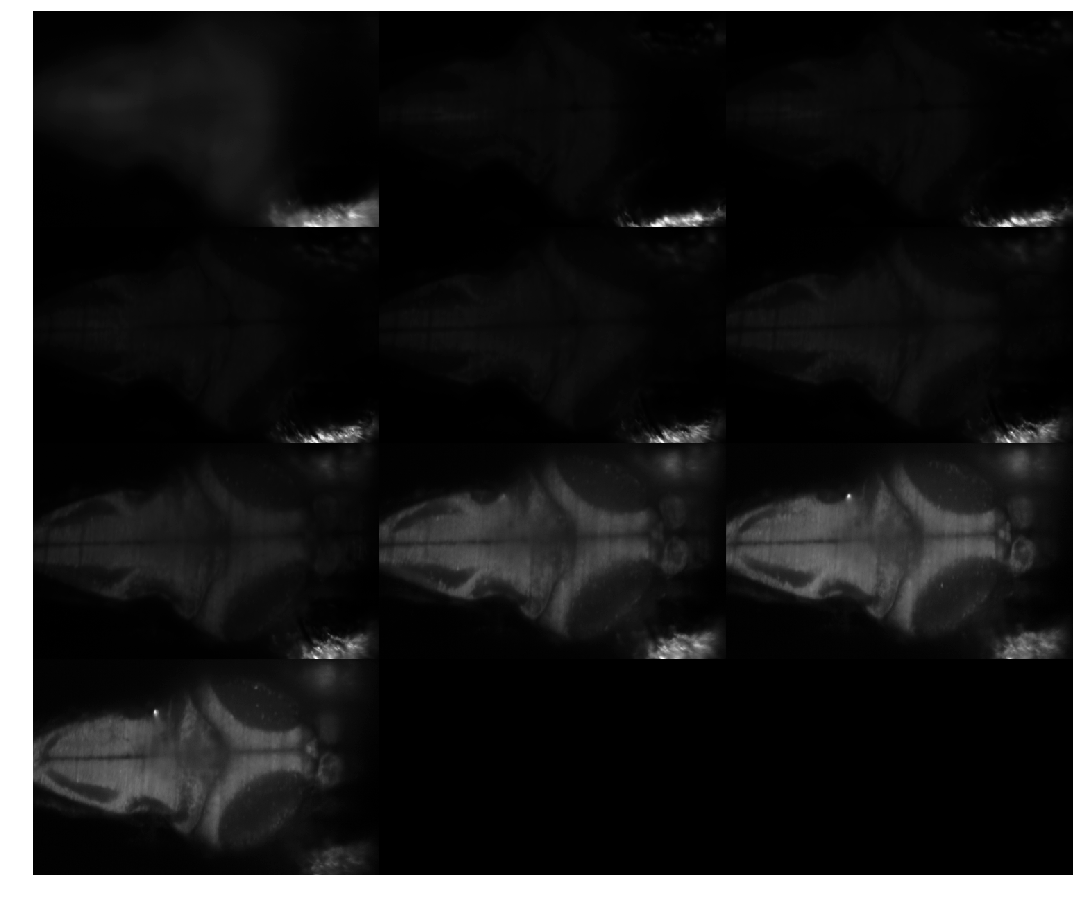

>> Starting rigid registration <<
Completed 100.0% at 2019-03-12 09:51:30
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


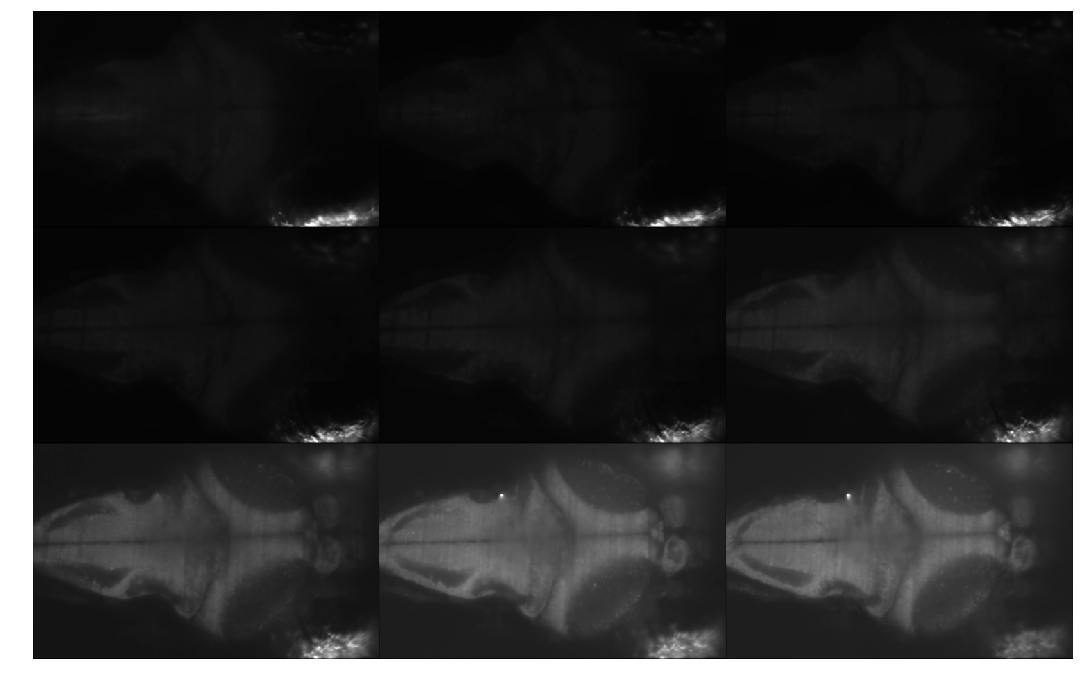

>> Starting rigid registration <<
Completed 10.0% at 2019-03-12 10:03:34
Completed 20.0% at 2019-03-12 10:15:44
Completed 40.0% at 2019-03-12 10:36:49
Completed 70.0% at 2019-03-12 11:09:37
Completed 80.0% at 2019-03-12 11:20:44
All done with rigid registration
The returned file contains tifs


In [30]:
# Produce mean image and run registration to the mean (rigid)
#-------------------------------------------------------------------------------
Fish  = cf.cde_mot_makepath(Fish, prefix = 'RM')

# for f in range(len(Fish)):
for f in [0,10]:
    for c in range(len(Fish[f]["cond"])):
        
        print('=========================================================')
        print('Working on fish ' + str(f+1) + ' of ' + str(len(Fish)) + ', condition: ' + Fish[f]["cond"][c]["name"] )
        print('=========================================================')
        tifs  = Fish[f]["cond"][c]["tifs"]
        Fimg  = Fish[f]["cond"][c]["path"]
        Fsave = Fish[f]["cond"][c]["savepath"]

        # Calculate mean image - iterative rigid registration to find good mean image
        #-------------------------------------------------------------------------------
        mimg, imglist     = cf.cde_mot_meancalc(tifs, Fimg, noimages = 50)   # mimg is provisional mean image
        moved             = cf.cde_mot_rigidreg(mimg, imglist, Fimg)        # moved is provisionally registred images
        mimg2, imglist2   = cf.cde_mot_meancalc(moved, Fimg, crop = True)   # mimg2 is the post-reg mean image

        # run registration to mean
        #-------------------------------------------------------------------------------
        moved             = cf.cde_mot_rigidreg(mimg2, tifs, Fimg, saveprog = True,
                                                savesuff = Fish[f]["cond"][c]["name"][0], savedir = Fsave)